# Business Problem

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df  = pd.read_csv('student_marks.csv')

In [3]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [ ]:
df.shape

## Discover and visualize the data to gain insights

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [5]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0.5, 1.0, 'Scatter Plot of Students Study Hours vs Students marks')

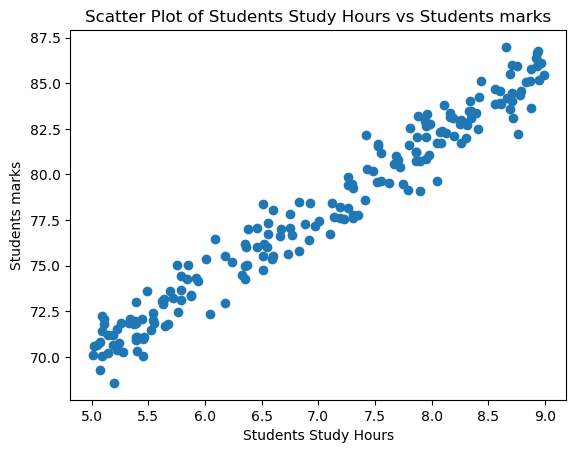

In [6]:
plt.scatter(df.study_hours, df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")

## Prepare the data for Machine Learning algorithms 

In [ ]:
# Data Cleaning

In [7]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [8]:
df.study_hours.mean()

6.9959487179487185

In [9]:
df2 = df.fillna(df.study_hours.mean())

In [10]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [ ]:
# split dataset

In [11]:
X = df2.drop("student_marks", axis = "columns")
#X = df2.study_hours
y = df2.student_marks

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) #, random_state=51

In [13]:
X_train

,study_hours
119,6.600000
122,6.995949
133,5.760000
14,8.190000
102,8.260000
...,...
140,8.600000
108,5.840000
40,5.280000
92,5.440000


In [14]:
y_train

119    75.55
122    76.83
133    72.46
14     83.08
102    82.99
       ...  
140    84.58
108    74.25
40     70.27
92     72.08
131    71.86
Name: student_marks, Length: 160, dtype: float64

In [ ]:
X_test

In [ ]:
y_test

# Select a model and train it

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
lr.coef_

array([3.88428356])

In [17]:
lr.intercept_

50.78728327607175

In [19]:
m = 3.88428356
c = 50.78728327607175
z  = m * 40 + c 
z

206.15862567607175

In [18]:
lr.predict([[40]])

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([206.15862568])

In [ ]:
y_pred  = lr.predict(X_test)
y_pred

In [ ]:
temp = np.c_[X_test, y_test, y_pred]
temp

In [ ]:
pd.DataFrame(data = np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

## Fine-tune your model

In [20]:
lr.score(X_test,y_test)

0.9418920823881899

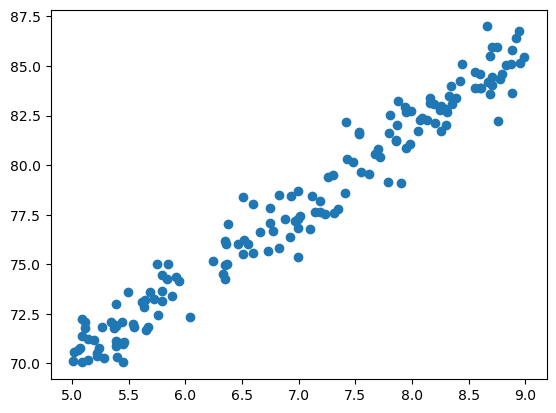

In [21]:
plt.scatter(X_train,y_train)  

In [ ]:
lr.predict(X_train)

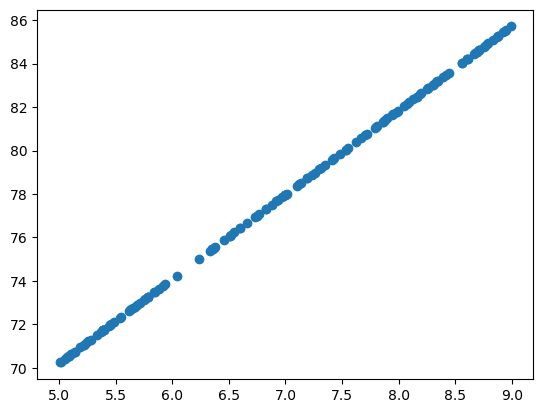

In [22]:
plt.scatter(X_train, lr.predict(X_train))

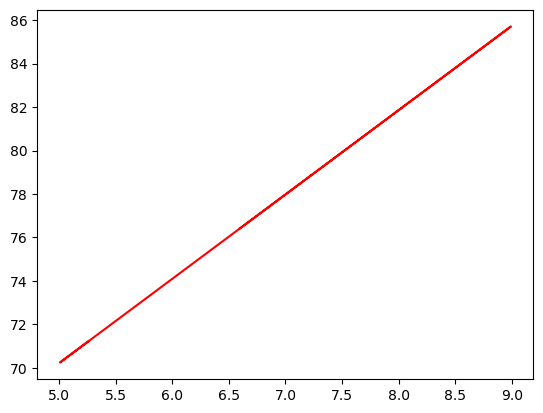

In [23]:
plt.plot(X_train, lr.predict(X_train), 'r-')

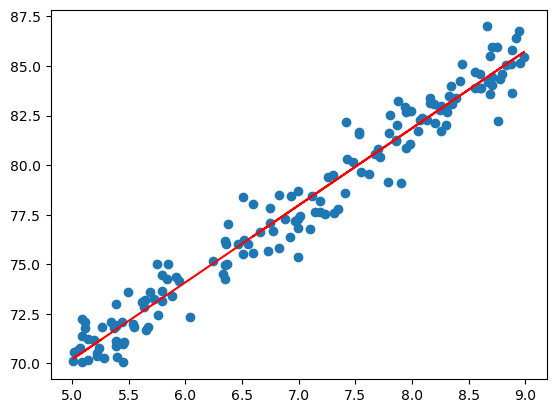

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = "r")

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color = "r")

In [ ]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = "r")